### Import

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load US COVID-19 Daily Dataset in reverse row order so that dates increase

In [11]:
us_daily = pd.read_csv('./us_covid19_daily.csv')
us_daily = us_daily.iloc[::-1]
us_daily.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
174,20200122,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-22T00:00:00Z,2,2,2,0,0,0,0,0,d538c99729d1fee626212d1878a100c1e1204a5f
173,20200123,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-23T00:00:00Z,2,2,2,0,0,0,0,0,cee36ebf3174bf1df0daa36e1e8088a157406fad
172,20200124,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-24T00:00:00Z,2,2,2,0,0,0,0,0,bfffe76fc0b7cf11efe8aecd3cc7b22598d77d61
171,20200125,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-25T00:00:00Z,2,2,2,0,0,0,0,0,bef2a1d5f2a13491e0e0369bbd46c10cdd12973b
170,20200126,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-26T00:00:00Z,2,2,2,0,0,0,0,0,e1cf59ab48e1cf367c4a6798a508a23d9d36bd18


### Add new date column for visualization

In [13]:
date_new = list(range(1,176))
us_daily['date_new'] = date_new
us_daily

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,date_new
174,20200122,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,0,0,0,0,d538c99729d1fee626212d1878a100c1e1204a5f,1
173,20200123,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,0,0,0,0,cee36ebf3174bf1df0daa36e1e8088a157406fad,2
172,20200124,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,0,0,0,0,bfffe76fc0b7cf11efe8aecd3cc7b22598d77d61,3
171,20200125,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,0,0,0,0,bef2a1d5f2a13491e0e0369bbd46c10cdd12973b,4
170,20200126,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,0,0,0,0,e1cf59ab48e1cf367c4a6798a508a23d9d36bd18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,20200710,56,3167984,35751437,2493.0,51544.0,257571.0,5889.0,11523.0,2197.0,...,38921914,38919421,38919421,854,2318,756730,66645,823375,f32acc8a0a75e68d628c9ba1fe481bac263d093e,171
3,20200711,56,3230991,36323867,2618.0,51798.0,262712.0,5928.0,11612.0,2169.0,...,39557476,39554858,39554858,757,5141,572430,63007,635437,c8509fb6eafbe5bc7aa33e4cdd7b0c9488029d08,172
2,20200712,56,3291969,36990207,2639.0,52578.0,263651.0,5919.0,11679.0,2182.0,...,40284815,40282176,40282176,476,939,666340,60978,727318,b54a9db52f34cf994d9feb257d49daf9faed3e37,173
1,20200713,56,3350434,37653841,2610.0,53921.0,264865.0,6061.0,11749.0,2259.0,...,41006885,41004275,41004275,327,1214,663634,58465,722099,b8a05ff4777f828893dd206d2505de6efe69835f,174


### Although the rate of new positive cases per day is increasing, the rate of new deaths per day is decreasing from a high of about 2600. This suggests that the death rate is decreasing.

<AxesSubplot:xlabel='date_new', ylabel='positiveIncrease'>

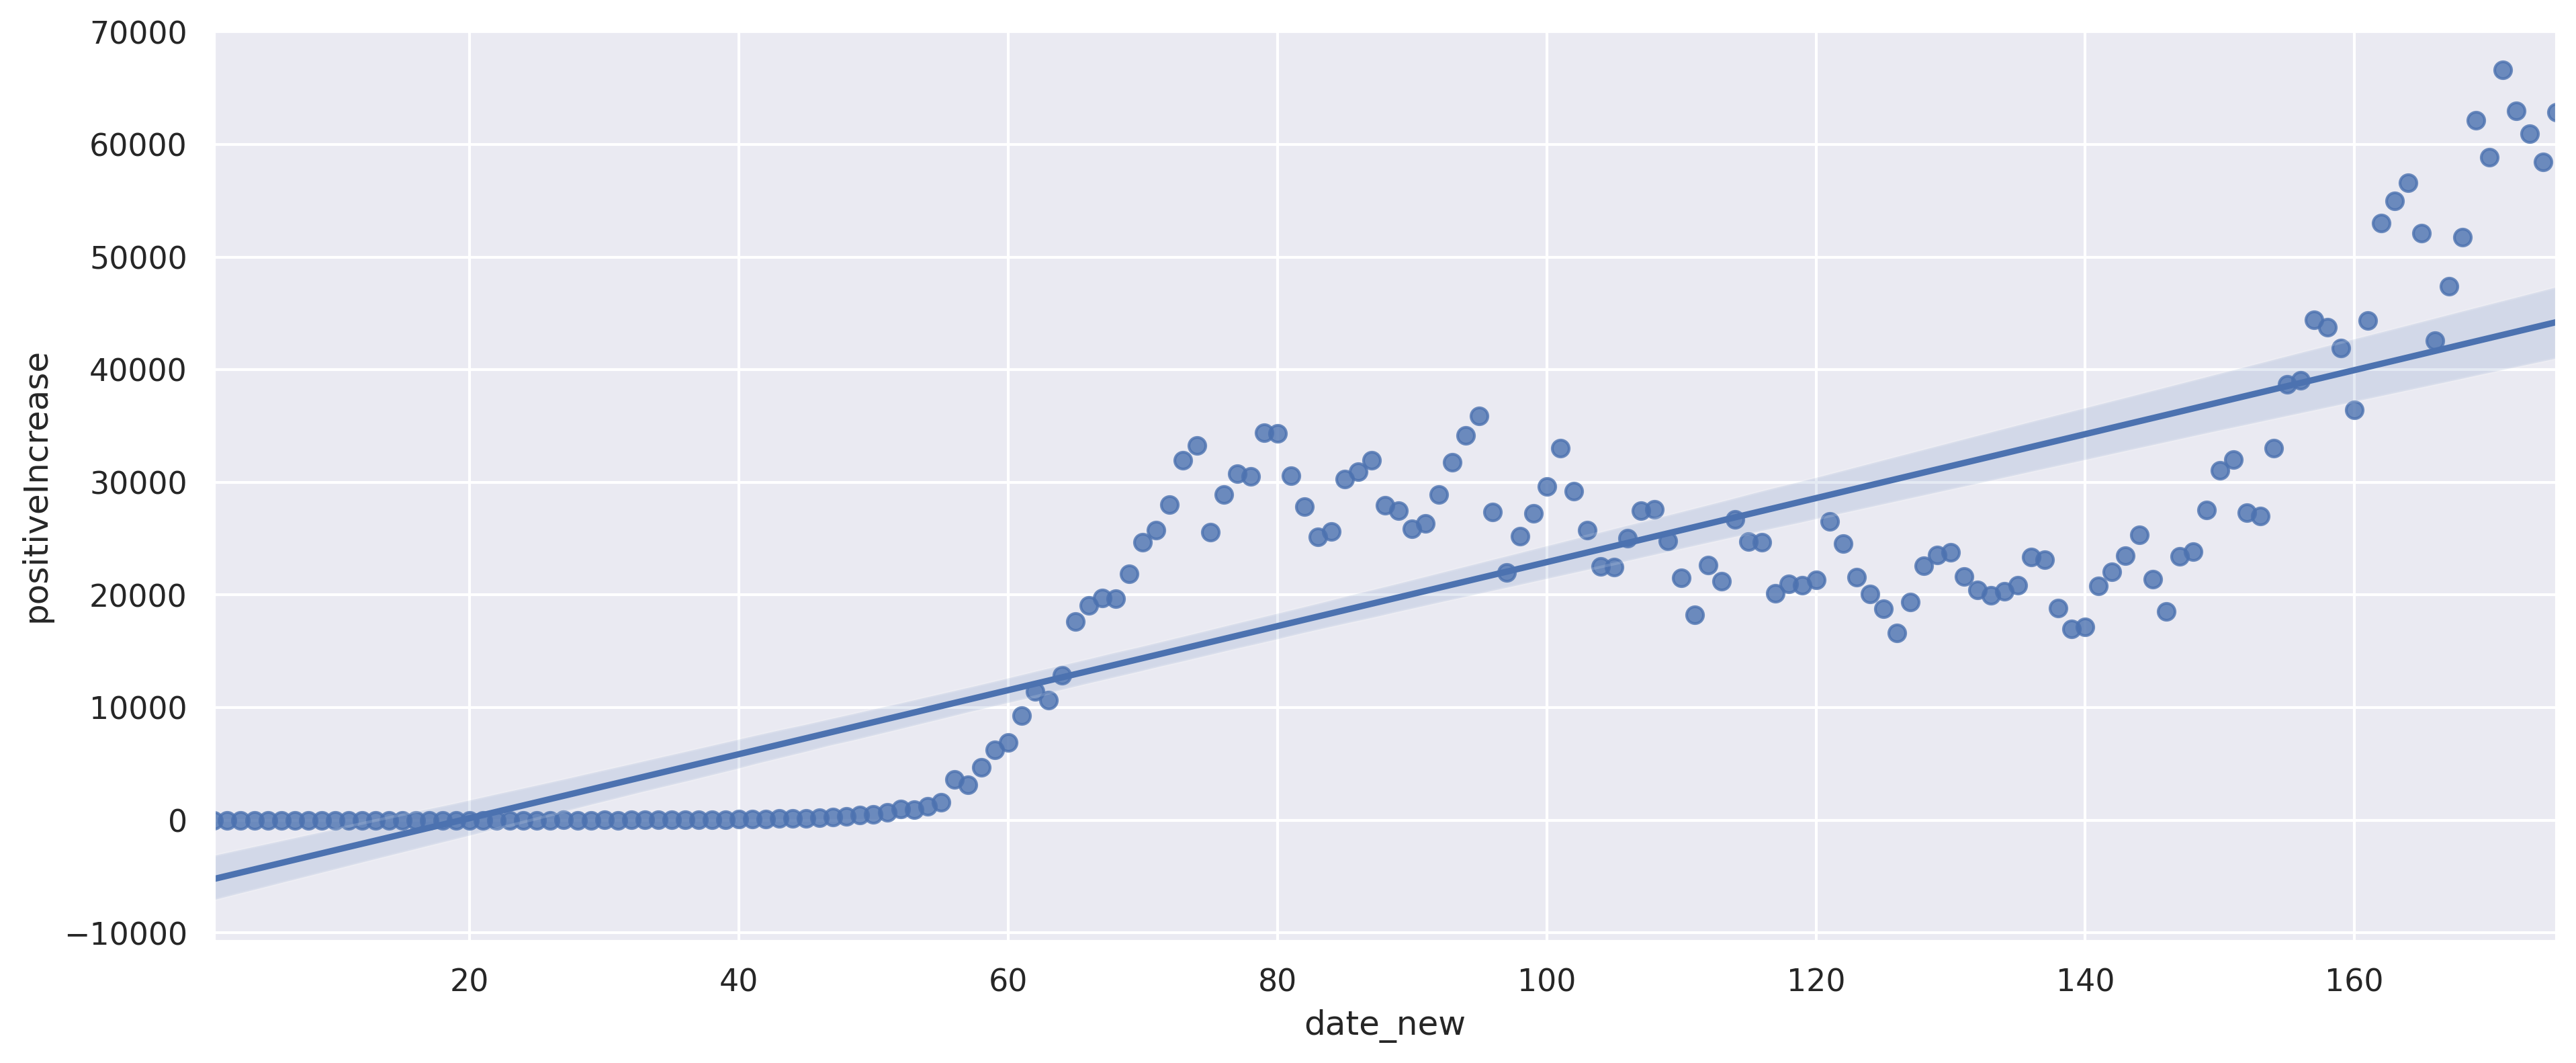

In [20]:
sns.set()
plt.figure(figsize=(15,6), dpi=300)
sns.regplot(x="date_new", y="positiveIncrease", data=us_daily)

<AxesSubplot:xlabel='date_new', ylabel='deathIncrease'>

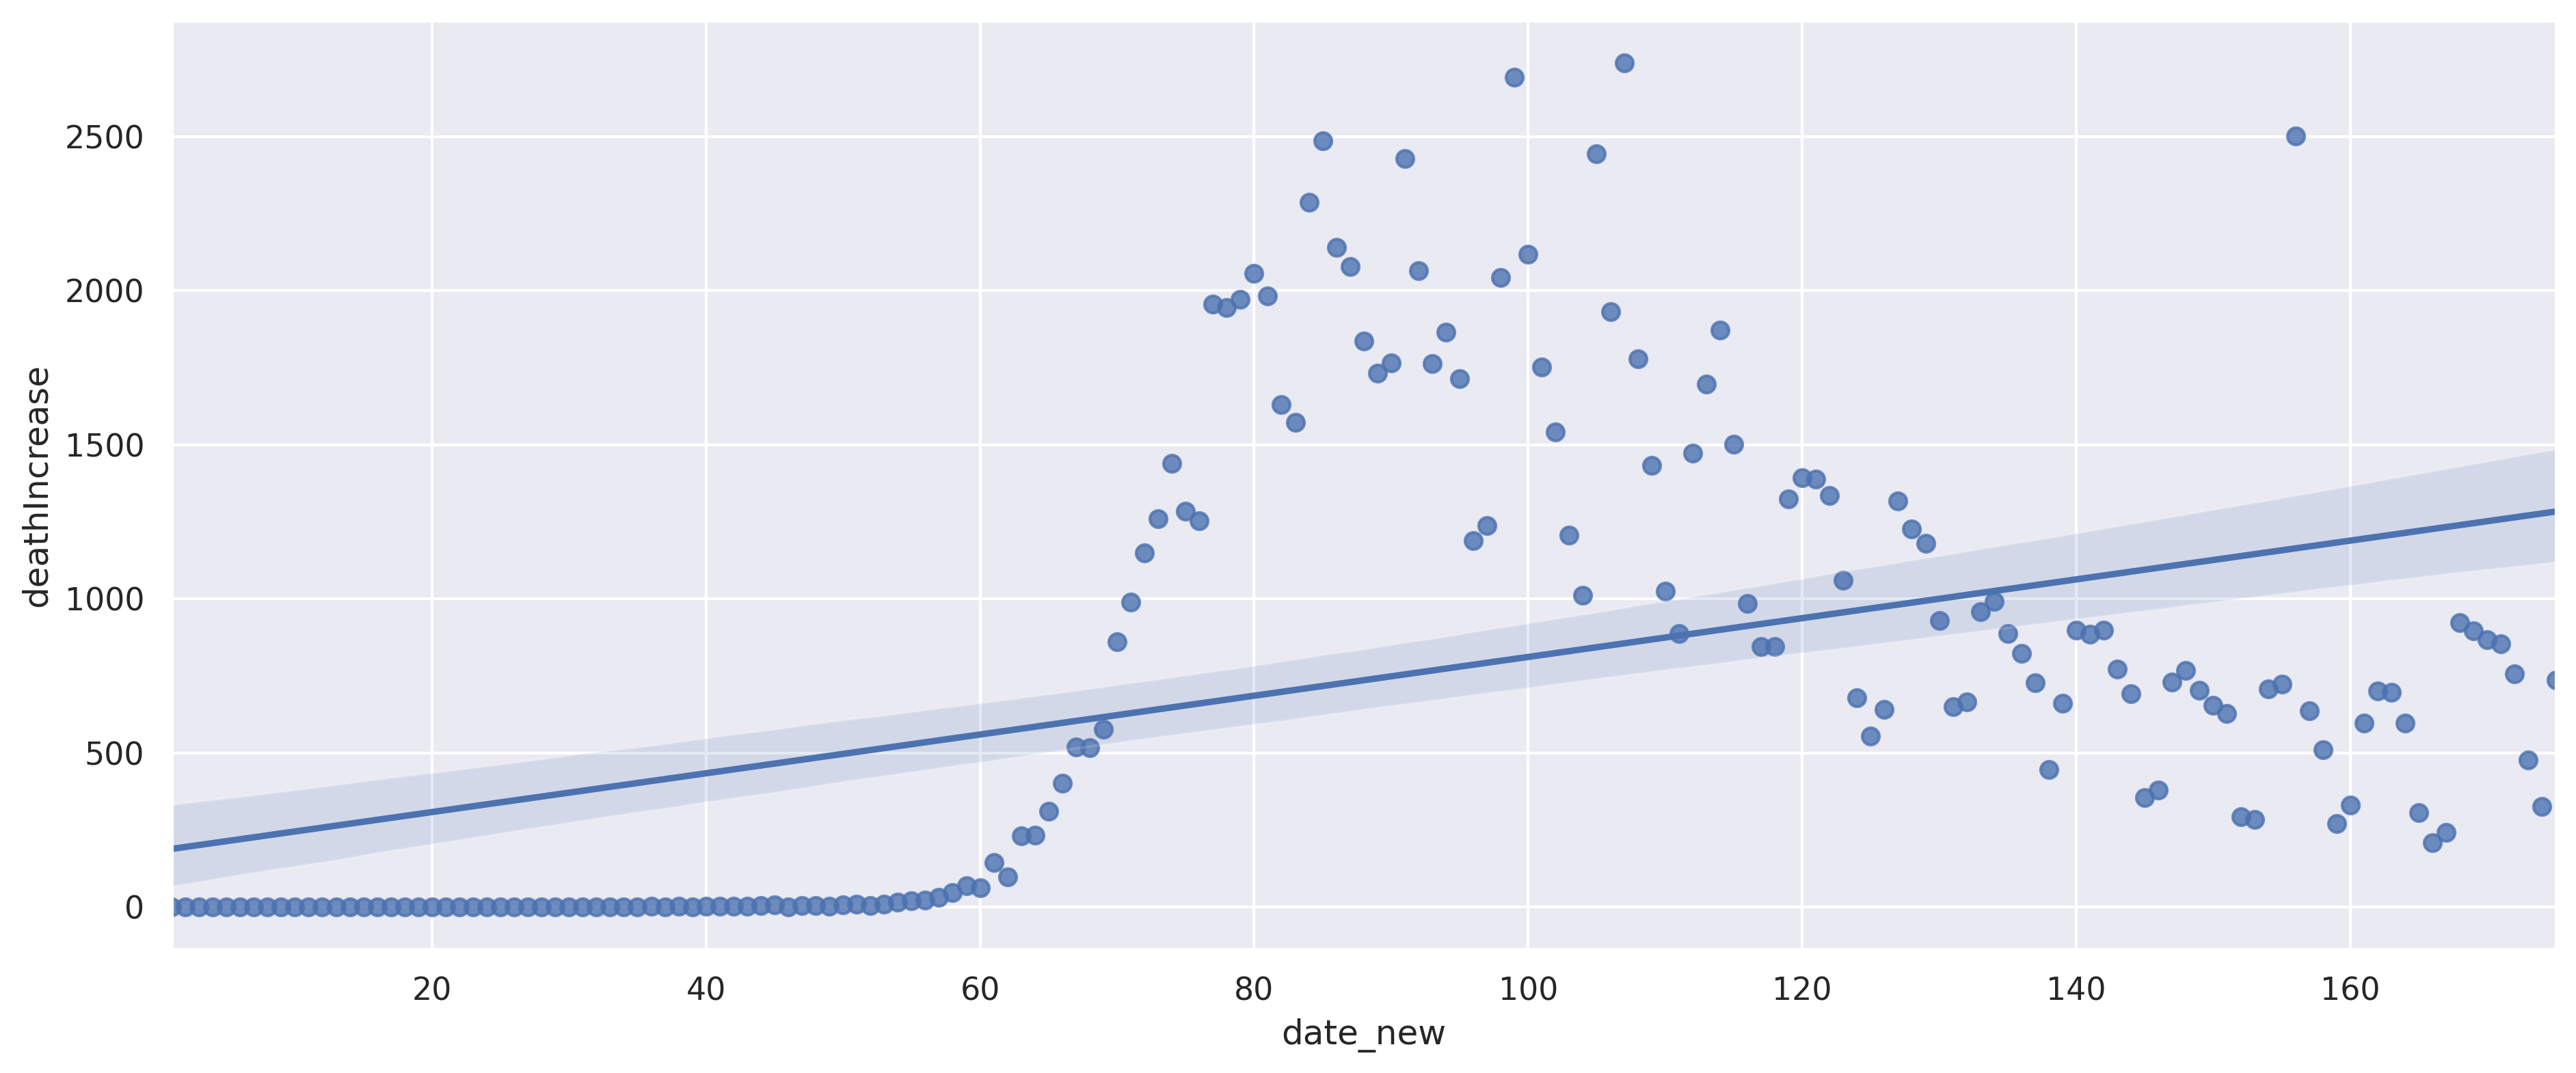

In [21]:
sns.set()
plt.figure(figsize=(15,6), dpi=300)
sns.regplot(x="date_new", y="deathIncrease", data=us_daily)

### This hypothesis appear wrong however, as although the death rate has fallen in recent months the linear regression of the death rate is still trending upwards.

<AxesSubplot:xlabel='date_new', ylabel='deathRate'>

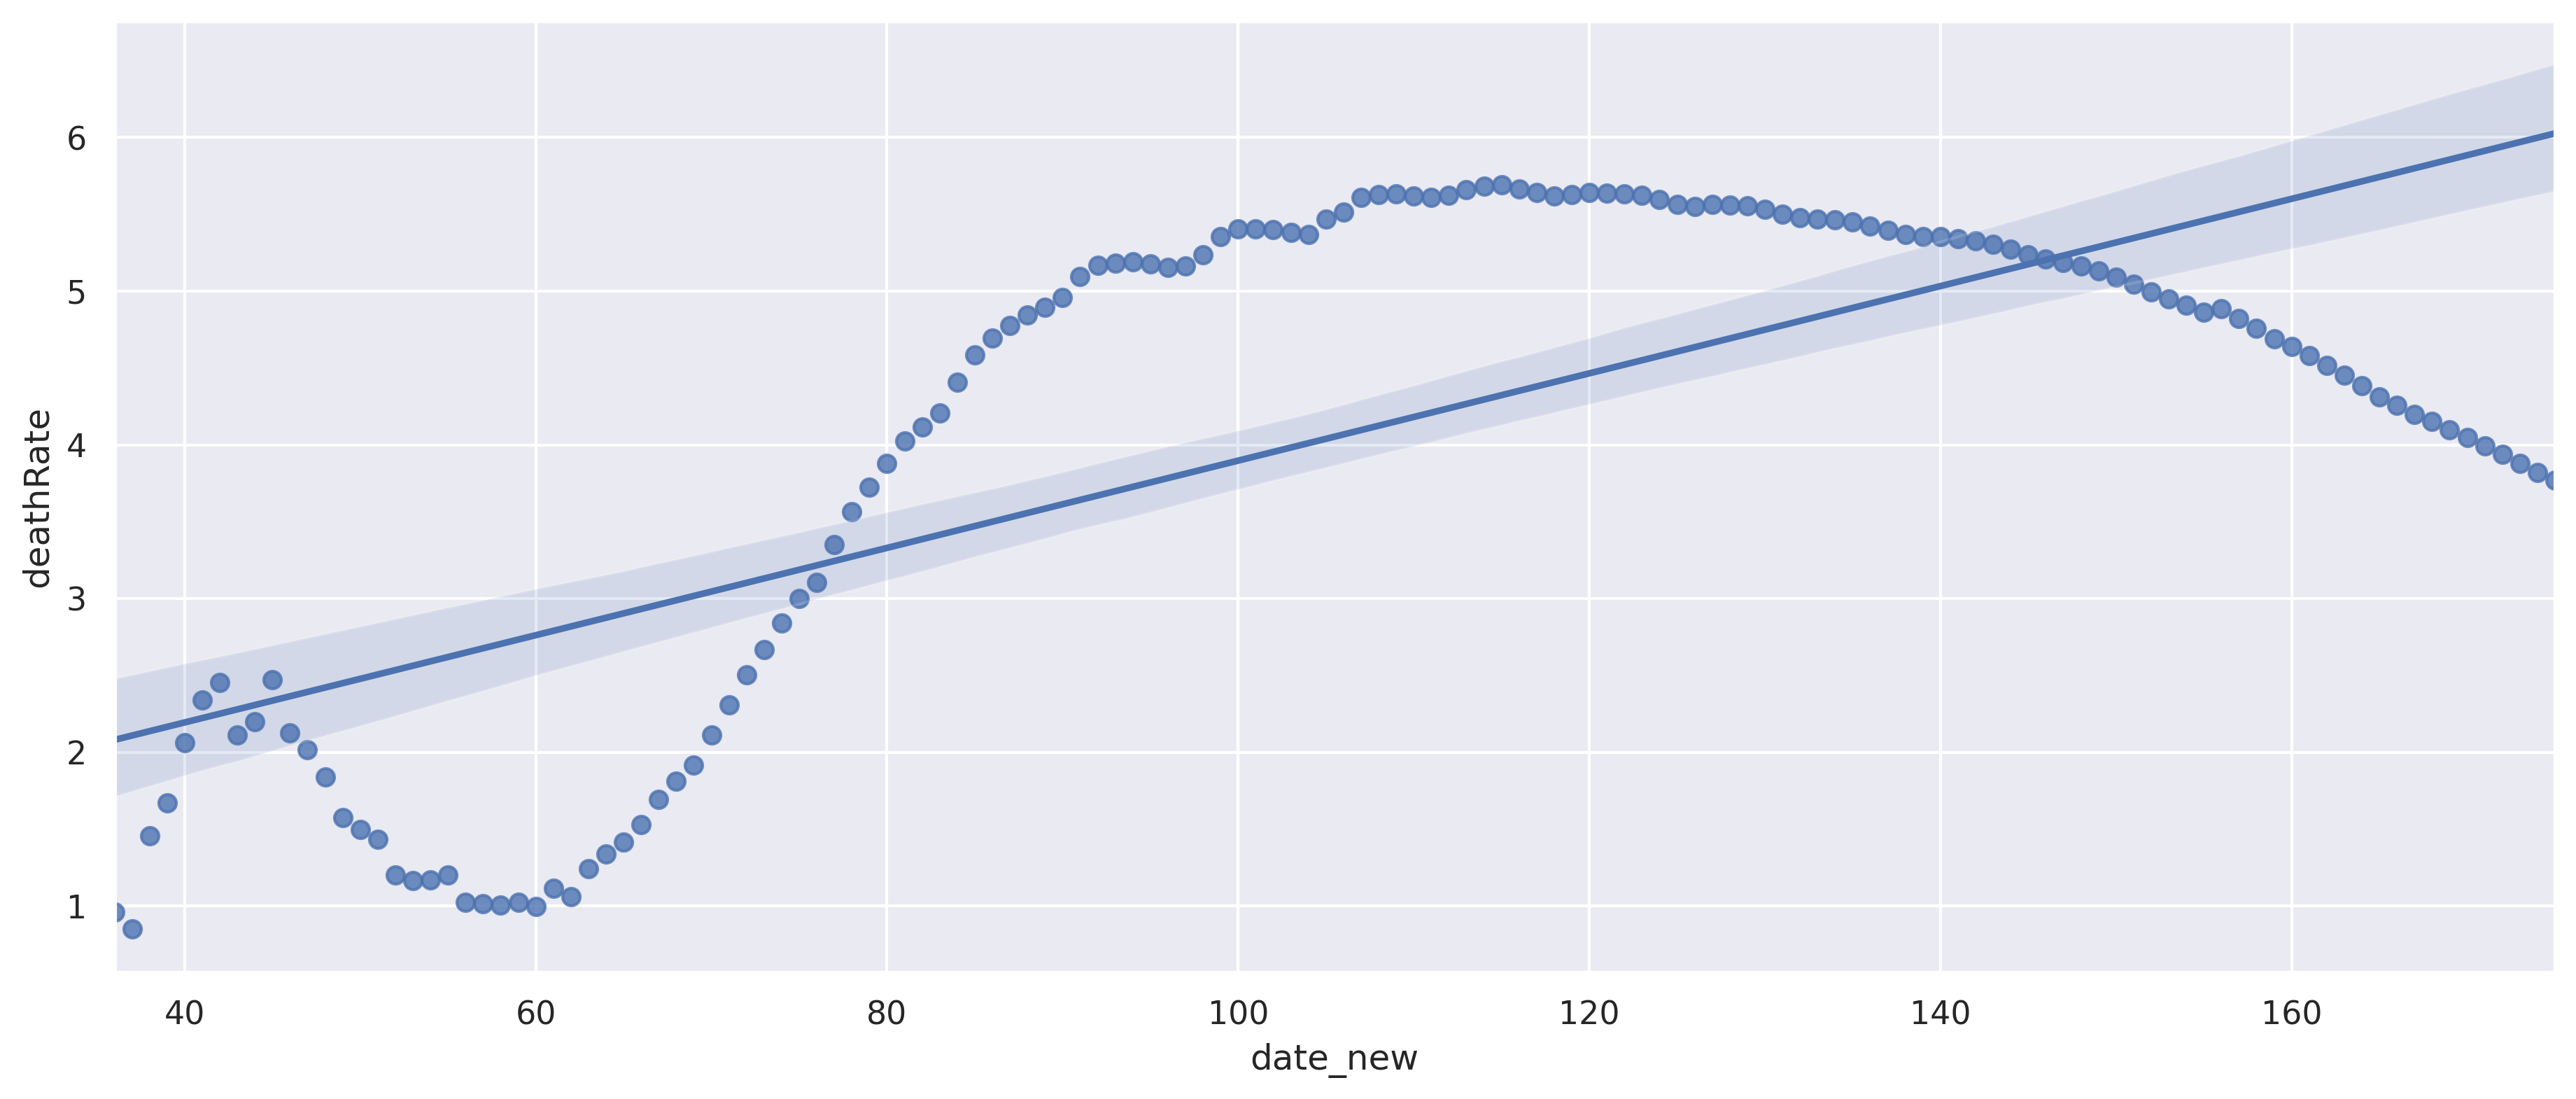

In [28]:
us_daily['deathRate'] = us_daily['death'] / us_daily['positive'] * 100
sns.set()
plt.figure(figsize=(15,6), dpi=300)
sns.regplot(x="date_new", y="deathRate", data=us_daily)